1. get (9) acquisition functions for the given dataset, feature, metric
2. results to a dataframe, then create a separate df for each acq function where rows*cols = cycles*seeds
3. plot each acquisition function (mean, std)

In [1]:
from collections import defaultdict
from unittest import result
import pandas as pd
import glob
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_results(data, features, metric):
    results = defaultdict(list)
    for ack in glob.glob(data + '/' + features + '/*'):
        _ack = ack.replace(data + '/' + features + '/', '')
        _ack =_ack=_ack.split('\\')[-1] #keep the line for windows, remove for linux
        results[_ack] = defaultdict(list)
        for seed in glob.glob(ack + '/*'):
            _seed = seed.replace(ack + '/', '')
            _seed = _seed.split('\\')[-1] #keep the line for windows, remove for linux
            print(_ack, _seed)
            d = pd.read_pickle(seed + '/results.pickle')
            for cycle in range(len(d)):
                results[_ack][_seed].append(d[cycle][metric])
    return results

In [3]:
#data = sys.argv[1]
#features = sys.argv[2]
#metric = sys.argv[3]

data = 'data_sanchez_2021_tau'
features = 'feat_achilles'
metric = 'MeanAbsoluteError'

results = get_results(data, features, metric)
results

acq_adversarialBIM seed_1972492700
acq_adversarialBIM seed_2106424110
acq_adversarialBIM seed_305273120
acq_adversarialBIM seed_876856523
acq_adversarialBIM seed_993364151
acq_badge seed_1972492700
acq_badge seed_2106424110
acq_badge seed_305273120
acq_badge seed_876856523
acq_badge seed_993364151
acq_coreset seed_1972492700
acq_coreset seed_2106424110
acq_coreset seed_305273120
acq_coreset seed_876856523
acq_coreset seed_993364151
acq_kmeans_data seed_1972492700
acq_kmeans_data seed_2106424110
acq_kmeans_data seed_305273120
acq_kmeans_data seed_876856523
acq_kmeans_data seed_993364151
acq_kmeans_embedding seed_1972492700
acq_kmeans_embedding seed_2106424110
acq_kmeans_embedding seed_305273120
acq_kmeans_embedding seed_876856523
acq_kmeans_embedding seed_993364151
acq_marginsample seed_1972492700
acq_marginsample seed_2106424110
acq_marginsample seed_305273120
acq_marginsample seed_876856523
acq_marginsample seed_993364151
acq_random seed_1972492700
acq_random seed_2106424110
acq_rando

defaultdict(list,
            {'acq_adversarialBIM': defaultdict(list,
                         {'seed_1972492700': [0.64885116,
                           0.52337897,
                           0.6139177,
                           0.5491529,
                           0.4651787,
                           0.5243575,
                           0.51989037,
                           0.51385826],
                          'seed_2106424110': [0.4733613,
                           0.8045728,
                           0.5652856,
                           0.5158462,
                           0.44965714,
                           0.48293483,
                           0.51793265,
                           0.5200209],
                          'seed_305273120': [0.5988778,
                           0.42740884,
                           0.5290483,
                           0.48341697,
                           0.51730865,
                           0.47938076,
                        

In [4]:
df = pd.DataFrame.from_dict(results,orient='index')
df

,seed_1972492700,seed_2106424110,seed_305273120,seed_876856523,seed_993364151
acq_adversarialBIM,"[0.64885116, 0.52337897, 0.6139177, 0.5491529,...","[0.4733613, 0.8045728, 0.5652856, 0.5158462, 0...","[0.5988778, 0.42740884, 0.5290483, 0.48341697,...","[0.74348384, 0.7571029, 0.7307064, 0.4757711, ...","[0.46667978, 0.5082192, 0.5614894, 0.4307435, ..."
acq_badge,"[0.64885116, 0.69387317, 0.53602326, 0.6519782...","[0.4733613, 0.6297441, 0.6482324, 0.524151, 0....","[0.5988778, 0.41880897, 0.4901922, 0.39143494,...","[0.74348384, 0.7147812, 0.55959016, 0.60771877...","[0.46667978, 0.52924687, 0.46912485, 0.6165104..."
acq_coreset,"[0.64885116, 0.49444553, 0.51283884, 0.439607,...","[0.4733613, 0.70210606, 0.5506769, 0.42707354,...","[0.5988778, 0.6136993, 0.60294175, 0.47247493,...","[0.74348384, 0.55343366, 0.59994245, 0.6882643...","[0.46667978, 0.6010471, 0.6554014, 0.67728406,..."
acq_kmeans_data,"[0.64885116, 0.6992176, 0.5695838, 0.41895145,...","[0.4733613, 0.8049696, 0.6532647, 0.49575433, ...","[0.5988778, 0.5254623, 0.5381684, 0.62707716, ...","[0.74348384, 0.7782532, 0.73511505, 0.514373, ...","[0.46667978, 0.6480966, 0.66170603, 0.5388834,..."
acq_kmeans_embedding,"[0.64885116, 0.48264748, 0.5595997, 0.5093072,...","[0.4733613, 0.6838899, 0.6597639, 0.51035666, ...","[0.5988778, 0.44707295, 0.45419165, 0.4859272,...","[0.74348384, 0.5050918, 0.55936843, 0.81357193...","[0.46667978, 0.59691566, 0.5384304, 0.6342894,..."
acq_marginsample,"[0.64885116, 0.5333305, 0.5297986, 0.62736344,...","[0.4733613, 0.6654602, 0.4923731, 0.6792712, 0...","[0.5988778, 0.5153258, 0.53314096, 0.4488019, ...","[0.74348384, 0.6873403, 0.5569261, 0.64474696,...","[0.46667978, 0.5702689, 0.47229868, 0.5393446,..."
acq_random,"[0.64885116, 0.58889633, 0.54463184, 0.604647,...","[0.4733613, 0.7334591, 0.649837, 0.5459226, 0....","[0.5988778, 0.5579482, 0.4870067, 0.35833505, ...","[0.74348384, 0.5389047, 0.73540676, 0.7087094,...","[0.46667978, 0.4059402, 0.4754078, 0.41154715,..."
acq_softuncertain,"[0.64885116, 0.6316115, 0.6116731, 0.5341022, ...","[0.4733613, 0.8456056, 0.69302815, 0.47329283,...","[0.5988778, 0.48366147, 0.4634431, 0.4443506, ...","[0.74348384, 0.6329746, 0.36885494, 0.51157767...","[0.46667978, 0.6243264, 0.5830495, 0.43706265,..."
acq_topuncertain,"[0.64885116, 0.45585996, 0.34624732, 0.4703288...","[0.4733613, 0.51152766, 0.39269957, 0.5589537,...","[0.5988778, 0.5171867, 0.4253665, 0.509213, 0....","[0.74348384, 0.5404478, 0.54929084, 0.65567887...","[0.46667978, 0.49153376, 0.54455703, 0.5588906..."


In [5]:
def fun(df):
    df_ = pd.DataFrame(columns=df.columns)
    for col in df.columns: #would be nice to do it without a loop
        df_[col]=pd.Series(df[col][0])
    return df_

def fun1(df):
    dfs = []
    for acq in df.index:
        acq_df = df[df.index==acq]
        acq_df = fun(acq_df)
        dfs.append(acq_df)
    return dfs

In [6]:
dfs = fun1(df)
dfs
dfs[1]

,seed_1972492700,seed_2106424110,seed_305273120,seed_876856523,seed_993364151
0,0.648851,0.473361,0.598878,0.743484,0.466680
1,0.693873,0.629744,0.418809,0.714781,0.529247
2,0.536023,0.648232,0.490192,0.559590,0.469125
3,0.651978,0.524151,0.391435,0.607719,0.616510
4,0.554527,0.504367,0.449815,0.662251,0.546471
5,0.522250,0.474044,0.464006,0.566199,0.447217
6,0.564118,0.549845,0.432124,0.680981,0.559808
7,0.462657,0.496505,0.477583,0.528905,0.491445


In [7]:
def plot_acq(df,acq_name,color):
    fig1, ax1 = plt.subplots()
    D=df.to_numpy()
    sems = np.std(D, axis=1, ddof=1) / np.sqrt(np.size(D))
    means =np.mean(D, axis = 1)

    
    plt.xlabel('cycles')
    plt.ylabel('metric')
    plt.title(f'Mean and stderr over cycles for {acq_name} acquisition functin')

    ax1.plot([0,1,2,3,4,5,6,7],
                        means,
                        lw=6,
                        ls=":", label=acq_name, color=color
                    )

    ax1.fill_between(x=[0,1,2,3,4,5,6,7],
                        y1=means - 1.96 * sems,
                        y2=means + 1.96 * sems,
                        alpha=0.3, color=color
                    )
    ax1.legend(loc='best')
    fig1.savefig(f'plot_{acq_name}.jpg')

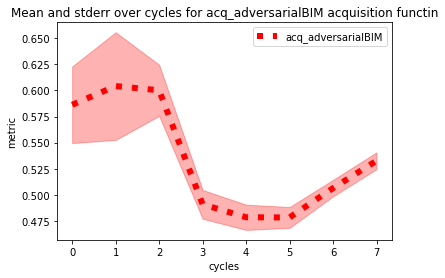

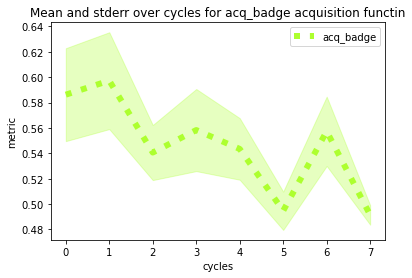

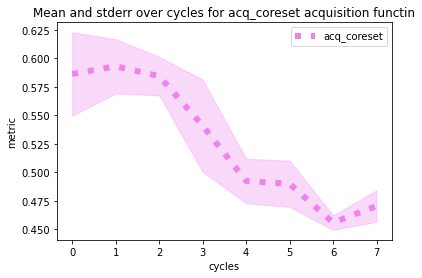

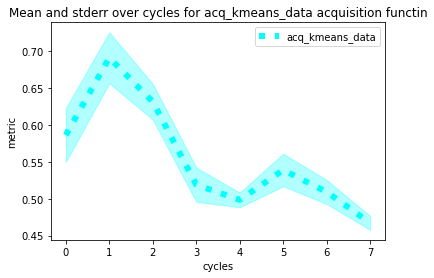

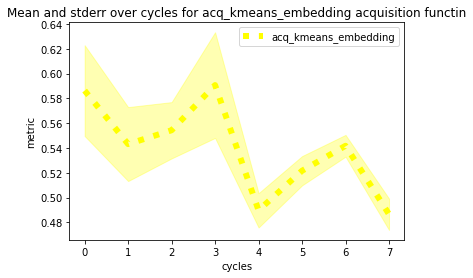

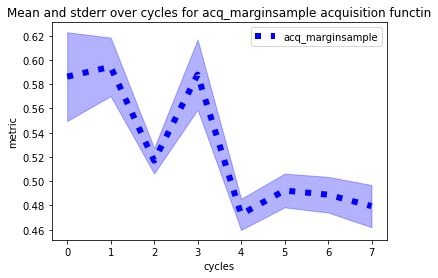

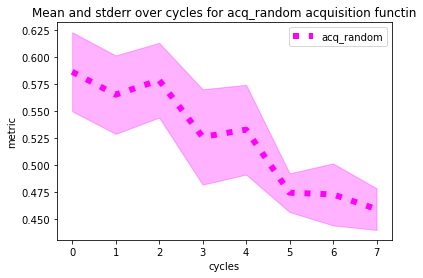

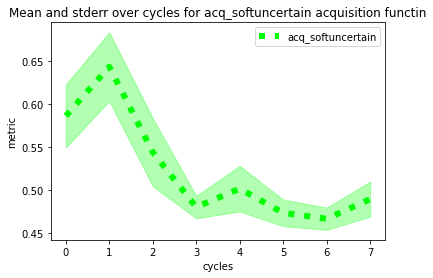

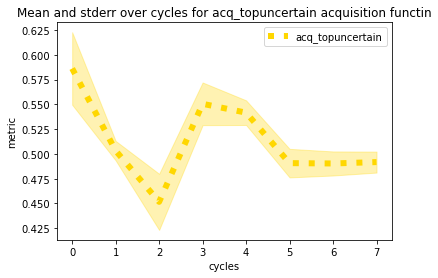

In [8]:
colors=['red','greenyellow','violet','cyan','yellow','blue','magenta','lime','gold']
for i in range(len(dfs)):
    plot_acq(dfs[i],df.index[i],colors[i])